In [1]:
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sklearn.metrics import mean_squared_error

## Loading Data File

In [106]:
kc_house = pd.read_csv("kc_house_data.csv")

In [3]:
kc_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
kc_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
kc_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Bagging class

In [6]:
class BaggedRegression:
    def __init__(self, n_estimators = 10, random_state = None):
        self.n_estimators = n_estimators
        self.samples = list()
        self.model_list = list()
        self.prediction_df = None
        self.random_state = random_state

    # Create bootstrap sample
    def __create_boot_samples(self, X_train):
        
        if self.random_state is not None:
            self.random_state = range(self.random_state, self.random_state + self.n_estimators)
        # Loop to get the number of samples defined by the user.
        for i in range(self.n_estimators):
            if self.random_state is None:
                boot_sample = X_train.sample(frac=1, replace=True)
            else:
                boot_sample = X_train.sample(frac=1, replace=True, random_state = self.random_state[i])

            self.samples.append(boot_sample.index.tolist())
    
    # Build model
    def __build_models(self, X_train, y_train):
        
        # Looping till every sample is used.
        for i in range(len(self.samples)):
            train_predictor = X_train.loc[self.samples[i],]
            train_response = y_train.loc[self.samples[i],]

            # Fitting decision tree using bootstrapped samples.
            model = LinearRegression()
            model.fit(train_predictor, train_response)
            self.model_list.append(model)
    
    # Building model
    def bagging_build(self, X_train, y_train):
        X_train = X_train.reset_index()
        y_train = y_train.reset_index()
        X_train = X_train.drop('index', axis = 1)
        y_train = y_train.drop('index', axis = 1)
        self.__create_boot_samples(X_train)
        self.__build_models(X_train, y_train)

    # Predict
    def bagging_predict(self, X_test):
        prediction_list = dict()
        for i in range(len(self.model_list)):
            predictions = self.model_list[i].predict(X_test)
            model_name = 'model_'+str(i+1)
            prediction_list[model_name] = list(predictions)
        self.prediction_df = pd.DataFrame(prediction_list)

        final_prediction = list()
        for i in range(self.prediction_df.shape[0]):
            final_prediction.append(np.mean(self.prediction_df.iloc[i, :]))
        return final_prediction

# Bagged Simple Linear Regression Model

### Using only 1 predictor to make it easier to visualize on a plot

In [7]:
X = kc_house['sqft_living']
y = kc_house['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [9]:
bagged_regressor = BaggedRegression(n_estimators=200)

In [10]:
bagged_regressor.bagging_build(X_train, y_train)

In [11]:
X_train = np.array(X_train).reshape((-1,1))
X_test = np.array(X_test).reshape((-1,1))
y_train = np.array(y_train).reshape((-1,1))
y_test = np.array(y_test).reshape((-1,1))

In [12]:
bagged_predictions = bagged_regressor.bagging_predict(X_test)

In [13]:
coef1 = list()
intercept = list()
for i in range(len(bagged_regressor.model_list)):
    coef1.append(bagged_regressor.model_list[i].coef_.tolist()[0][0])
    intercept.append(bagged_regressor.model_list[i].intercept_.tolist()[0])

In [14]:
print(np.mean(coef1))
print(np.mean(intercept))

279.86214055595275
-40538.339523021335


# Simple Linear Regression Model

In [15]:
direct_model = LinearRegression().fit(X_train, y_train)

In [16]:
direct_train_pred = direct_model.predict(X_train)

In [17]:
direct_train_df = pd.DataFrame({'X': X_train.tolist(), 'Prediction': direct_train_pred.tolist()})
direct_train_df.X = direct_train_df.X.apply(lambda x: x[0])
direct_train_df.Prediction = direct_train_df.Prediction.apply(lambda x: x[0])

In [18]:
ls_train_df = pd.DataFrame({'X': X_train.tolist(), 'Y': y_train.tolist()})
ls_train_df.X = ls_train_df.X.apply(lambda x: x[0])
ls_train_df.Y = ls_train_df.Y.apply(lambda x: x[0])

Populating the interactive namespace from numpy and matplotlib


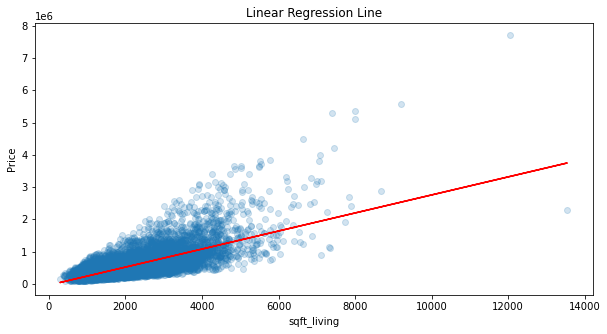

In [96]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

plt.scatter('X', 'Y', data=ls_train_df, alpha = 0.2)
plt.plot('X','Prediction', data=direct_train_df, linestyle = '-', color = 'red')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Linear Regression Line')
plt.show()

In [20]:
direct_predictions = direct_model.predict(X_test)

In [21]:
print(direct_model.coef_)
print(direct_model.intercept_)

[[279.73039149]]
[-40514.31944706]


In [30]:
print('RMSE for Simple Linear Regression: {}'.format(round(np.sqrt(mean_squared_error(y_test, direct_predictions)), 3)))
print('-' * 50)
print('RMSE for Bagged Simple Linear Regression: {}'.format(round(np.sqrt(mean_squared_error(y_test, bagged_predictions)), 3)))
print('-' * 50)
print('Difference in RMSE: {}'.format(round(round(np.sqrt(mean_squared_error(y_test, bagged_predictions)), 3) - round(np.sqrt(mean_squared_error(y_test, direct_predictions)), 3), 3)))

RMSE for Simple Linear Regression: 259039.12
--------------------------------------------------
RMSE for Bagged Simple Linear Regression: 259041.882
--------------------------------------------------
Difference in RMSE: 2.762


## Checking how different bagged predictions are from direct predictions

In [31]:
print('RMSE: '+ str(mean_squared_error(direct_predictions, bagged_predictions) ** 0.5))

RMSE: 279.1460344427417


In [32]:
print('MAPE: '+ str(np.mean(np.abs((direct_predictions - bagged_predictions) / direct_predictions)) * 100))

MAPE: 0.045971989531860664


In [33]:
import matplotlib.pyplot as plt

## Predictions from individual models created while bagging

In [78]:
points = dict()
for i in range(len(bagged_regressor.model_list)):
    proper_list = list()
    pred_list = bagged_regressor.model_list[i].predict(X_test).tolist()
    for j in pred_list:
        proper_list.append(j[0])
    points['model_'+str(i)] = proper_list

In [79]:
model_points = pd.DataFrame(points)

## Output using mean of coefficient and intercept of each model

In [80]:
def mean_equation(X_train):
    mean_pred = list()
    for i in X_train:
        calc_value = np.mean(intercept) + (np.mean(coef1) * float(i))
        mean_pred.append(calc_value)
    return mean_pred

In [81]:
mean_predictions = mean_equation(X_test)

In [82]:
model_points['Mean_Regression_Prediction'] = mean_predictions

In [83]:
model_points['Bagged_Predictions'] = bagged_predictions

In [84]:
model_points['Direct_Predictions'] = direct_predictions.tolist()

In [85]:
model_points['X'] = X_test.tolist()

In [86]:
model_points = model_points.sort_values('X')

In [87]:
model_points.shape

(6484, 204)

In [89]:
model_points = model_points.iloc[[0,1,2,3,4,6479,6480,6481,6482,6483],]

In [90]:
model_points.Direct_Predictions = model_points.Direct_Predictions.apply(lambda x: x[0])
model_points.X = model_points.X.apply(lambda x: x[0])
model_points.Bagged_Predictions = model_points.Bagged_Predictions.apply(lambda x: float(x))

In [99]:
model_points[['Mean_Regression_Prediction', 'Bagged_Predictions']].head()

,Mean_Regression_Prediction,Bagged_Predictions
1782,65809.273888,65809.273888
2817,88198.245133,88198.245133
5659,90996.866538,90996.866538
2120,104989.973566,104989.973566
2073,104989.973566,104989.973566


## Mean_Predictions and Bagged_Predictions are exactly same! So our prediction after bagging would have been same if we had built a model with taking the mean of coeffs

In [91]:
model_points

,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,...,model_194,model_195,model_196,model_197,model_198,model_199,Mean_Regression_Prediction,Bagged_Predictions,Direct_Predictions,X
1782,4.666905e+04,7.498677e+04,6.506325e+04,7.274598e+04,6.657626e+04,5.873966e+04,6.590749e+04,5.534044e+04,6.150159e+04,5.461808e+04,...,6.261591e+04,7.239238e+04,5.335226e+04,7.114512e+04,5.679287e+04,6.561658e+04,6.580927e+04,6.580927e+04,6.578323e+04,380
2817,7.001519e+04,9.678639e+04,8.749553e+04,9.486779e+04,8.879497e+04,8.164903e+04,8.840663e+04,7.811413e+04,8.402476e+04,7.766274e+04,...,8.523321e+04,9.455009e+04,7.643881e+04,9.341633e+04,7.969840e+04,8.799036e+04,8.819825e+04,8.819825e+04,8.816166e+04,460
5659,7.293345e+04,9.951134e+04,9.029956e+04,9.763302e+04,9.157230e+04,8.451270e+04,9.121902e+04,8.096084e+04,8.684016e+04,8.054332e+04,...,8.806038e+04,9.731980e+04,7.932463e+04,9.620023e+04,8.256159e+04,9.078708e+04,9.099687e+04,9.099687e+04,9.095896e+04,470
2120,8.752479e+04,1.131361e+05,1.043197e+05,1.114592e+05,1.054590e+05,9.883106e+04,1.052810e+05,9.519439e+04,1.009171e+05,9.494623e+04,...,1.021962e+05,1.111684e+05,9.375373e+04,1.101197e+05,9.687754e+04,1.047707e+05,1.049900e+05,1.049900e+05,1.049455e+05,520
2073,8.752479e+04,1.131361e+05,1.043197e+05,1.114592e+05,1.054590e+05,9.883106e+04,1.052810e+05,9.519439e+04,1.009171e+05,9.494623e+04,...,1.021962e+05,1.111684e+05,9.375373e+04,1.101197e+05,9.687754e+04,1.047707e+05,1.049900e+05,1.049900e+05,1.049455e+05,520
4393,2.185759e+06,2.072377e+06,2.120421e+06,2.099657e+06,2.102365e+06,2.157811e+06,2.127391e+06,2.141979e+06,2.125187e+06,2.166085e+06,...,2.134927e+06,2.102592e+06,2.168658e+06,2.111745e+06,2.155512e+06,2.115613e+06,2.117199e+06,2.117199e+06,2.116207e+06,7710
2666,2.276225e+06,2.156851e+06,2.207346e+06,2.185379e+06,2.188462e+06,2.246585e+06,2.214575e+06,2.230227e+06,2.212465e+06,2.255383e+06,...,2.222569e+06,2.188453e+06,2.258118e+06,2.198046e+06,2.244271e+06,2.202312e+06,2.203956e+06,2.203956e+06,2.202923e+06,8020
4293,2.748984e+06,2.598293e+06,2.661599e+06,2.633346e+06,2.638391e+06,2.710499e+06,2.670182e+06,2.691394e+06,2.668559e+06,2.722037e+06,...,2.680569e+06,2.637147e+06,2.725621e+06,2.649038e+06,2.708108e+06,2.655381e+06,2.657333e+06,2.657333e+06,2.656087e+06,9640
4991,2.821941e+06,2.666417e+06,2.731700e+06,2.702477e+06,2.707825e+06,2.782091e+06,2.740492e+06,2.762562e+06,2.738944e+06,2.794052e+06,...,2.751248e+06,2.706390e+06,2.797767e+06,2.718636e+06,2.779687e+06,2.725299e+06,2.727298e+06,2.727298e+06,2.726019e+06,9890
429,2.865715e+06,2.707291e+06,2.773761e+06,2.743955e+06,2.749485e+06,2.825046e+06,2.782678e+06,2.805263e+06,2.781175e+06,2.837261e+06,...,2.793656e+06,2.747935e+06,2.841054e+06,2.760394e+06,2.822635e+06,2.767250e+06,2.769278e+06,2.769278e+06,2.767979e+06,10040


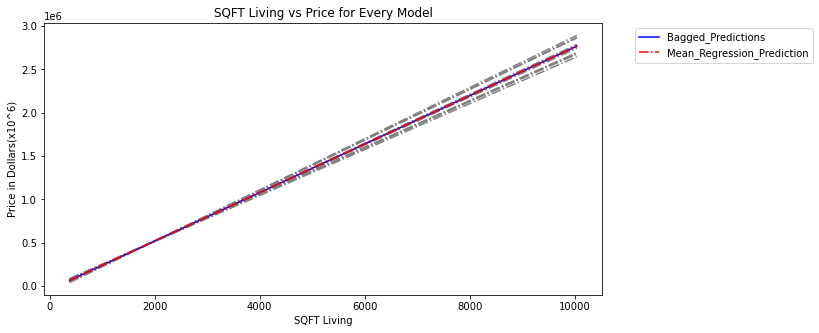

In [105]:
limit = model_points.shape[1]-4

for i in range(0, limit, 10):
    plt.plot('X', 'model_'+str(i), data=model_points, color = 'grey', linestyle = '-.')
p1, = plt.plot('X', 'Bagged_Predictions', data=model_points, color = 'blue')
p2, = plt.plot('X', 'Mean_Regression_Prediction', data=model_points, color = 'red', linestyle = '-.')
plt.xlabel('SQFT Living')
plt.ylabel('Price in Dollars(x10^6)')
plt.title('SQFT Living vs Price for Every Model')
plt.legend(handles = [p1, p2], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()